In [ ]:
!wget https://github.com/lastranger21/kacangkering/raw/main/Dry_Bean_Dataset.xlsx

--2022-06-01 07:17:08--  https://github.com/lastranger21/kacangkering/raw/main/Dry_Bean_Dataset.xlsx
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lastranger21/kacangkering/main/Dry_Bean_Dataset.xlsx [following]
--2022-06-01 07:17:09--  https://raw.githubusercontent.com/lastranger21/kacangkering/main/Dry_Bean_Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3043104 (2.9M) [application/octet-stream]
Saving to: ‘Dry_Bean_Dataset.xlsx’

Dry_Bean_Dataset.xl 100%[===================>]   2.90M  --.-KB/s    in 0.04s   

2022-06-01 07:17:09 (66.1 MB/s) - ‘Dry_Bean_Dataset.xlsx’ saved [

In [ ]:
import pandas as pd

data  = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
print(data.Class.unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [ ]:
data.isna().values.any()
data.isnull().values.any()

False

In [ ]:
def zscore(df_input):
  list_fitur = df_input.columns[:-1] #mengambil semua kolom kecuali kolom terakhir
  for fitur  in list_fitur:
    std = df_input[fitur].std()
    mean = df_input[fitur].mean()
    df_input[fitur] = (df_input[fitur]-mean)/(std)
  return df_input

In [ ]:
data = zscore(data)

In [ ]:
from sklearn.model_selection import train_test_split
data_latih, data_uji = train_test_split(data,random_state=101, test_size=0.33)

In [ ]:
label_latih = data_latih.pop('Class')
label_uji = data_uji.pop('Class')

In [ ]:
#data.drop(['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4'],axis=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as kp

KNN = kp(n_neighbors=18)
model_KNN = KNN.fit(data_latih.values, label_latih.values)
kelas = model_KNN.predict(data_uji.values)
percentage = sum(kelas==label_uji)/(data_uji.shape[0])
print(sum(kelas==label_uji),"benar dari ",data_uji.shape[0])
print(percentage)

4149 benar dari  4492
0.9236420302760463


Maximum accuracy:- 0.9254229741763135 at K = 18


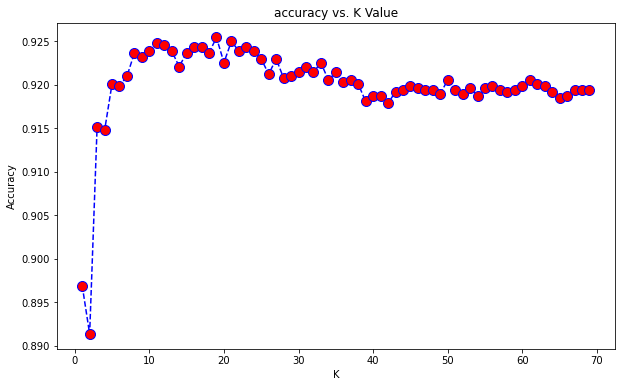

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,70):
    neigh = kp(n_neighbors = i).fit(data_latih,label_latih)
    yhat = neigh.predict(data_uji)
    acc.append(metrics.accuracy_score(label_uji, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,70),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_uji, kelas))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       400
      BOMBAY       1.00      1.00      1.00       185
        CALI       0.92      0.95      0.94       531
    DERMASON       0.91      0.94      0.92      1163
       HOROZ       0.98      0.93      0.96       642
       SEKER       0.96      0.94      0.95       675
        SIRA       0.86      0.86      0.86       896

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492



[[ 360    0   25    0    2    4    9]
 [   0  185    0    0    0    0    0]
 [  14    0  504    0    3    1    9]
 [   0    0    0 1091    0   12   60]
 [   0    0   16    5  600    0   21]
 [   5    0    0   11    1  634   24]
 [   6    0    2   98    8    7  775]]


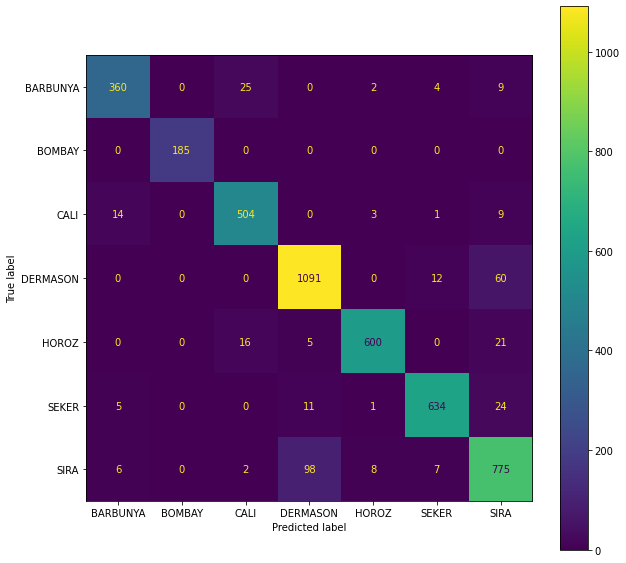

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(label_uji,kelas)
print(cf_matrix)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(label_uji,kelas,ax=ax)
plt.show()